In [99]:
# TO DO : 
# reset x range for graphs when to 1 to blabla, if possble do scatter


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
results = pd.read_table('results.out', sep=' ',header=0)
results_chimera = pd.read_table('results_chimera.out', sep=' ',header=0)
results_chimera_nonweighted = pd.read_table('results_chimera_nonweighted.out', sep=' ',header=0)

In [100]:
results['lowerbound']=results['miqpopt']*0.878

results_chimera['lowerbound']=results_chimera['miqpopt']*0.878
results_chimera['sdprank'] = results_chimera['sdpopt'].apply(lambda x : str(x).split('(')[1][:-1])
results_chimera['sdpopt'] = results_chimera['sdpopt'].apply(lambda x : float(str(x).split('(')[0]))

results_chimera_nonweighted['sdprank'] = results_chimera_nonweighted['sdpopt'].apply(lambda x : str(x).split('(')[1][:-1])
results_chimera_nonweighted['sdpopt'] = results_chimera_nonweighted['sdpopt'].apply(lambda x : float(str(x).split('(')[0]))
results_chimera_nonweighted = results_chimera_nonweighted.groupby(results_chimera_nonweighted['k']).mean().drop(['p', 'k'], axis = 1)
results_chimera_nonweighted = results_chimera_nonweighted.reset_index()
results_chimera_nonweighted['lowerbound']=results_chimera_nonweighted['miqpopt']*0.878

results_chimera_nonweighted

,k,miqpopt,milpopt,sdpopt,gwopt,miqpcpu,milpcpu,sdpcpu,gwcpu,lowerbound
0,1,16.0,16.0,16.0,16.0,0.018488,0.023709,0.036471,0.189409,14.048
1,2,80.0,80.0,80.0,59.4,0.021659,0.037979,0.307441,0.518066,70.240
2,3,192.0,192.0,192.0,125.6,0.051272,0.080941,12.868053,13.422102,168.576
3,4,352.0,352.0,352.0,214.2,0.048244,0.111639,391.481778,392.331987,309.056


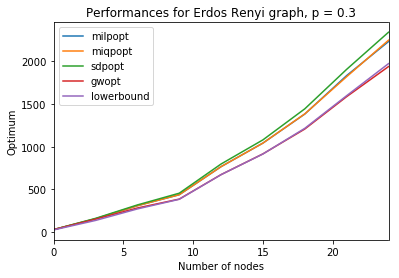

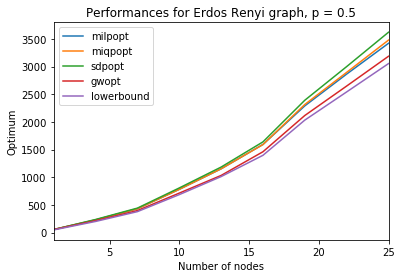

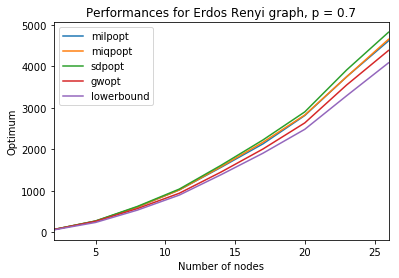

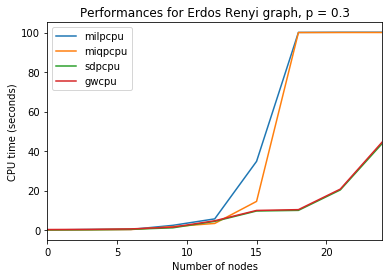

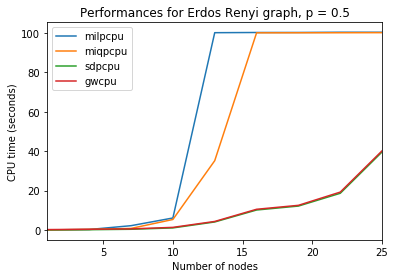

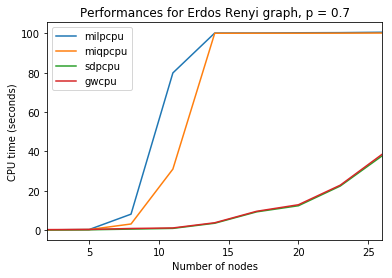

In [82]:
results[results['p']==0.3][['milpopt','miqpopt','sdpopt','gwopt','lowerbound']].plot()
plt.xlabel('Number of nodes')
plt.ylabel('Optimum')
plt.title('Performances for Erdos Renyi graph, p = 0.3')
results[results['p']==0.5][['milpopt','miqpopt','sdpopt','gwopt','lowerbound']].plot()
plt.xlabel('Number of nodes')
plt.ylabel('Optimum')
plt.title('Performances for Erdos Renyi graph, p = 0.5')
results[results['p']==0.7][['milpopt','miqpopt','sdpopt','gwopt','lowerbound']].plot()
plt.xlabel('Number of nodes')
plt.ylabel('Optimum')
plt.title('Performances for Erdos Renyi graph, p = 0.7')

results[results['p']==0.3][['milpcpu','miqpcpu','sdpcpu','gwcpu']].plot()
plt.xlabel('Number of nodes')
plt.ylabel('CPU time (seconds)')
plt.title('Performances for Erdos Renyi graph, p = 0.3')
results[results['p']==0.5][['milpcpu','miqpcpu','sdpcpu','gwcpu']].plot()
plt.xlabel('Number of nodes')
plt.ylabel('CPU time (seconds)')
plt.title('Performances for Erdos Renyi graph, p = 0.5')
results[results['p']==0.7][['milpcpu','miqpcpu','sdpcpu','gwcpu']].plot()
plt.xlabel('Number of nodes')
plt.ylabel('CPU time (seconds)')
plt.title('Performances for Erdos Renyi graph, p = 0.7')

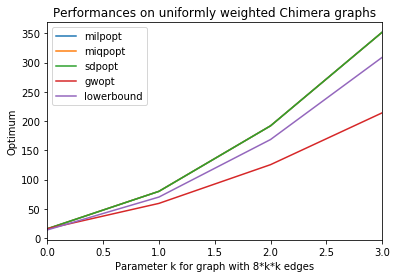

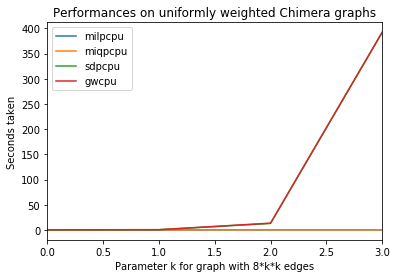

In [81]:
results_chimera_nonweighted[['milpopt','miqpopt','sdpopt','gwopt','lowerbound']].plot()
plt.title('Performances on uniformly weighted Chimera graphs')
plt.xlabel('Parameter k for graph with 8*k*k edges')
plt.ylabel('Optimum')

results_chimera_nonweighted[['milpcpu','miqpcpu','sdpcpu','gwcpu']].plot()
plt.title('Performances on uniformly weighted Chimera graphs')
plt.xlabel('Parameter k for graph with 8*k*k edges')
plt.ylabel('Seconds taken')

In [101]:
#Normalization
for col in ['milpopt', 'sdpopt', 'gwopt', 'lowerbound'] :
    results_chimera[col] = results_chimera[col]/results_chimera['miqpopt']
results_chimera['miqpopt'] = 1.0
results_chimera = results_chimera.groupby(results_chimera['k']).mean().drop(['p', 'k'], axis = 1)
results_chimera = results_chimera.reset_index()

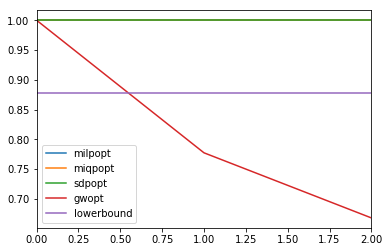

In [103]:
results_chimera['miqpopt'] = 1.0
results_chimera[['milpopt','miqpopt','sdpopt','gwopt','lowerbound']].plot()
plt.title('Normalized Performances on weighted Chimera graph')
plt.xlabel('Parameter k for C_k graph')